In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt
import seaborn as sns #data visualization

#show scientific notation as usual float
pd.options.display.float_format = '{:.0f}'.format

In [2]:
#import macro data
macro=pd.read_csv("macro (3).csv")

In [3]:
#import data
raw_data=pd.read_csv("sberbank_train.csv")

In [4]:
#import data fix
data_fix=pd.read_excel("BAD_ADDRESS_FIX.xlsx", sheet_name='BAD')

In [5]:
raw_data.update(data_fix)

In [6]:
raw_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 292 columns):
id                                       30471 non-null float64
timestamp                                30471 non-null object
full_sq                                  30471 non-null int64
life_sq                                  24088 non-null float64
floor                                    30304 non-null float64
max_floor                                20899 non-null float64
material                                 20899 non-null float64
build_year                               16866 non-null float64
num_room                                 20899 non-null float64
kitch_sq                                 20899 non-null float64
state                                    16912 non-null float64
product_type                             30471 non-null object
sub_area                                 30471 non-null object
area_m                                   30471 non-null float64

We immediately observe that there are many variables with NaN values - let us list them.

In [7]:
percent_missing = raw_data.isnull().sum() * 100 / len(raw_data)
missing_value_df = pd.DataFrame({'column_name': raw_data.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df_sorted=missing_value_df[missing_value_df.percent_missing>0]

In [8]:
missing_value_df_sorted

,column_name,percent_missing
hospital_beds_raion,hospital_beds_raion,47
build_year,build_year,45
state,state,44
cafe_avg_price_500,cafe_avg_price_500,43
cafe_sum_500_max_price_avg,cafe_sum_500_max_price_avg,43
cafe_sum_500_min_price_avg,cafe_sum_500_min_price_avg,43
max_floor,max_floor,31
material,material,31
num_room,num_room,31
kitch_sq,kitch_sq,31


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

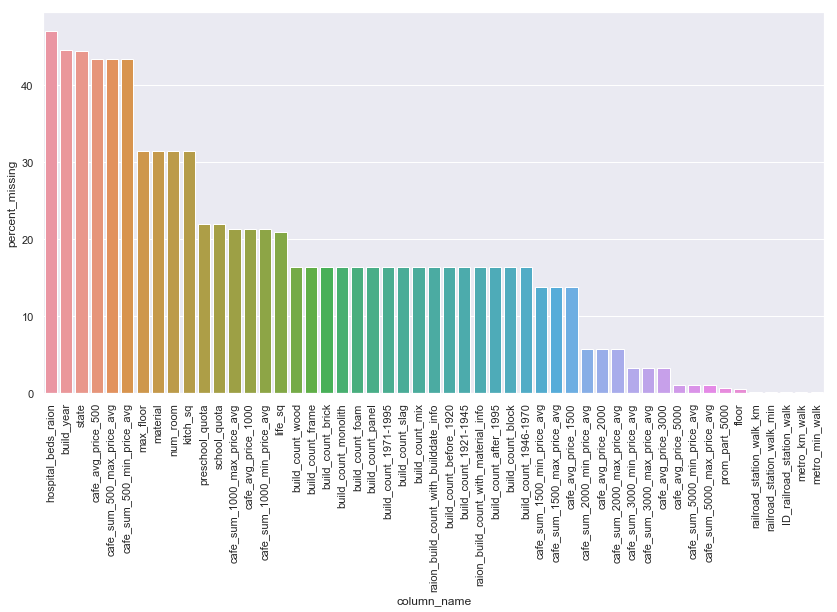

In [9]:
sns.set(rc={'figure.figsize':(14,7)})
sns.barplot(x='column_name', y='percent_missing', data=missing_value_df_sorted)
plt.xticks(rotation=90)

We observet that percent of missing values ranges from close to zero 40+%. As there are several observable groups of % of missing data, it is possible, that data has been scrapped from several sources.

In [10]:
raw_data.columns[raw_data.isna().any()].tolist()

['life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'preschool_quota',
 'school_quota',
 'hospital_beds_raion',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'metro_min_walk',
 'metro_km_walk',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'ID_railroad_station_walk',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_1000',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_sum_2000_min_price_avg',
 'cafe_su

In [11]:
#getting number of columns containing NaN values
len(raw_data.columns[raw_data.isna().any()].tolist())

51

51 of 292 columns or 17% contain NaN values. We need to find approximation for each of them.

In [12]:
#create checkpoint
df1=raw_data.copy()

In [13]:
#First column with NaN values is life_sq or living area. We can approximate it as % of total area or full_sq
avg_life_sq=sum(df1[df1.life_sq.notnull()].life_sq)/sum(df1[df1.life_sq.notnull()].full_sq)
df1.life_sq=df1.life_sq.fillna(avg_life_sq*df1.full_sq)

In [14]:
#filling in N/A floor values - have a first glance at entries 
df1[df1.floor.isnull()].head()

#we observe that max_floor is also missing in many entries, possible solution -  include last floor and first floor variables and calculate relevant discounts, then compare to given price 

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
178,12105,2011-10-22,98,94,nan,nan,nan,nan,nan,nan,...,0,0,0,0,8,0,0,1,0,11500000
187,12711,2011-10-24,49,29,nan,nan,nan,nan,nan,nan,...,2,1,0,0,7,0,0,1,0,8300000
195,13411,2011-10-25,37,23,nan,nan,nan,nan,nan,nan,...,2,1,0,0,7,0,0,1,0,2000000
215,14695,2011-10-26,45,27,nan,nan,nan,nan,nan,nan,...,1,0,0,2,3,0,0,6,1,2825000
294,19396,2011-11-05,33,20,nan,nan,nan,nan,nan,nan,...,1,0,0,2,3,0,0,6,1,1000000


# Getting most of the subarea variable

Besides size of the apartment and its distance from city centre, subarea plays a major role in the pricing - same apartment 10km from Kremlin but in a different subarea can be significantly cheaper/more expensive.

In [15]:
#creating pivot with subareas and total number of apartments
pivot_subareas=pd.pivot_table(df1, index='sub_area', values='price_doc', aggfunc="count")
#convert pivot to dataframe
pivot_subareas=pivot_subareas.reset_index().rename_axis(None, axis=1)
#rename price_doc as count
pivot_subareas=pivot_subareas.rename(columns={'price_doc': "count"})
#sort counts of apartments in each subarea in descending order
pivot_subareas.sort_values('count', ascending=False, inplace=True)
#renaming pivot subareas to district
districts=pivot_subareas.copy()

In [16]:
pivot_price_sqm=pd.pivot_table(df1, index='sub_area', values=["price_doc", "full_sq"], aggfunc=sum)
pivot_price_sqm["area_price_m2"]=pivot_price_sqm.price_doc/pivot_price_sqm.full_sq
pivot_price_sqm=pivot_price_sqm.reset_index().rename_axis(None, axis=1)

districts.merge(pivot_price_sqm, on='sub_area')
pivot_price_sqm=pivot_price_sqm.drop(columns=["full_sq", "price_doc"])

df1=pivot_price_sqm.merge(df1, on="sub_area")

In [17]:
#check each subarea and corresponding price per m2
pd.set_option('display.max_rows', 500)
pivot_price_sqm

,sub_area,area_price_m2
0,Ajeroport,175918
1,Akademicheskoe,181084
2,Alekseevskoe,177583
3,Altuf'evskoe,118741
4,Arbat,281046
5,Babushkinskoe,155382
6,Basmannoe,189635
7,Begovoe,186161
8,Beskudnikovskoe,135946
9,Bibirevo,134785


In [18]:
df1[df1.sub_area=='Birjulevo Vostochnoe']

,sub_area,area_price_m2,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
1165,Birjulevo Vostochnoe,82030,713,2011-12-27,34,21,7,nan,nan,nan,...,6,2,0,4,11,0,2,31,6,990000
1166,Birjulevo Vostochnoe,82030,1038,2012-02-02,53,31,1,nan,nan,nan,...,4,1,0,3,9,0,2,20,4,5500000
1167,Birjulevo Vostochnoe,82030,1075,2012-02-04,47,30,9,nan,nan,nan,...,6,2,0,4,9,0,2,20,4,5700000
1168,Birjulevo Vostochnoe,82030,1133,2012-02-09,38,20,3,nan,nan,nan,...,6,3,0,3,9,0,2,27,4,5200000
1169,Birjulevo Vostochnoe,82030,1136,2012-02-09,44,27,9,nan,nan,nan,...,7,3,0,4,10,0,2,31,6,5700000
1170,Birjulevo Vostochnoe,82030,1192,2012-02-14,39,20,12,nan,nan,nan,...,5,2,0,4,8,0,2,18,4,4700000
1171,Birjulevo Vostochnoe,82030,1212,2012-02-15,63,45,3,nan,nan,nan,...,6,2,0,4,10,0,2,34,6,7500000
1172,Birjulevo Vostochnoe,82030,1219,2012-02-16,42,19,13,nan,nan,nan,...,8,3,0,4,9,0,2,23,5,5300000
1173,Birjulevo Vostochnoe,82030,1295,2012-02-22,53,31,7,nan,nan,nan,...,6,2,0,4,9,0,2,23,6,1000000
1174,Birjulevo Vostochnoe,82030,1465,2012-03-07,38,20,12,nan,nan,nan,...,6,3,0,3,9,0,2,23,4,5000000


Upon closer examination we see that price in Birjulevo Vostochnoe is too low for Moscow and almost 40% lower than that in the neigbouring Birjulevo Zapadnoe. Another subarea with artificially low prices is Tverskoe - located in the heart of Moscow its area price is that of a suburban city. Possible explanation for inconsistent data in Tverskoe subarea is that listings in other sub areas could have been mistakenly assigned to Tverskoe.

# Cleaning listings in Tverskoy district

In [19]:
#check distance to Kremlin of Tverskoe sub_area listings
df1[df1.sub_area=='Tverskoe'].kremlin_km.describe()

count   676
mean      0
std       1
min       0
25%       0
50%       0
75%       0
max       4
Name: kremlin_km, dtype: float64

What we immediately see is that 75% of listing are 0 km from Kremlin. The issue here appears to be that listings have been mistakenly assigned to the very centre of Moscow (Kremlin). You can observe similar issue with listings across various platforms - if address has not been listed, it is set to Kremlin by default (e.g. Avito, CIAN listings). We will cross check with distance to Sadovoe ring.

In [20]:
#check distance to Sadovoe ring of Tverskoe sub_area listings
df1[df1.sub_area=='Tverskoe'].sadovoe_km.describe()

count   676
mean      2
std       0
min       0
25%       2
50%       2
75%       2
max       2
Name: sadovoe_km, dtype: float64

Again, most listings are 2km from Sadovoe ring - exact distance from Kremlin. Finally, we will segment apartmetns into those with sqm price of at least 180.000, which is realistic minimum price in that area

In [21]:
#add price per sq m to each entry
df1['price_m2']=df1.price_doc/df1.full_sq


#move price per sq m to the df beginnig
cols = df1.columns.tolist()
cols.insert(1, cols.pop(-1))
df1 = df1[cols]

In [22]:
#compare number of listings in Tverskoy district with sq_m price of 180k+ vs 180k-
print('Number of listing in Tverskoe sub_area: ', len(df1[df1.sub_area=='Tverskoe']))
print('Number of listing in Tverskoe sub_area with sq m price >180.000: ',len(df1[(df1.sub_area=='Tverskoe')&(df1.price_m2>180000)]))

Number of listing in Tverskoe sub_area:  676
Number of listing in Tverskoe sub_area with sq m price >180.000:  85


Clearly most of the listing in Tverskoy district cannot be used for reference. We will therefore delete entries with price of <180k from the training dataset.

In [23]:
#drop Tverskoy listings with sqm price of <180.000
df1=df1.drop(df1[(df1.sub_area=='Tverskoe')&(df1.price_m2<180000)].index)

# Comparing price per m2 per year

Previously it was mistakenly assumed that average subarea price per m2 can be taken as average from the total sample. However, our data spans across four years and average prices have certainly changed over that period of time. We will now compare how average price per m2 has changed in 4 years.

In [24]:
#break timestamp into year and month
df1['date']=pd.to_datetime(df1.timestamp)
df1.drop('timestamp', axis=1)

df1['year'] = df1['date'].dt.year
df1['month'] = df1['date'].dt.month

In [25]:
#check change of average are price per m2 per year
temp1=pd.pivot_table(df1, index='sub_area', columns='year', values='price_doc', aggfunc=sum).reset_index()
temp2=pd.pivot_table(df1, index='sub_area', columns='year', values='full_sq', aggfunc=sum).reset_index()

#create new dataframe with average price per m2 per disttrict per year
temp3=pd.DataFrame()
temp3['district']=temp1.iloc[:,0]
temp3['2011']=temp1.iloc[:, 1]/temp2.iloc[:, 1]
temp3['2012']=temp1.iloc[:, 2]/temp2.iloc[:, 2]
temp3['2013']=temp1.iloc[:, 3]/temp2.iloc[:, 3]
temp3['2014']=temp1.iloc[:, 4]/temp2.iloc[:, 4]
temp3['2015']=temp1.iloc[:, 5]/temp2.iloc[:, 5]

In [26]:
temp3

,district,2011,2012,2013,2014,2015
0,Ajeroport,81609,146281,166918,181991,304307
1,Akademicheskoe,148494,137150,161738,195799,213275
2,Alekseevskoe,nan,135501,164289,188206,208848
3,Altuf'evskoe,nan,111557,129859,114569,169059
4,Arbat,nan,191111,299615,290625,274444
5,Babushkinskoe,nan,145645,164091,150329,165978
6,Basmannoe,155921,169501,180769,201190,198596
7,Begovoe,nan,159061,163393,206058,220687
8,Beskudnikovskoe,140000,108954,123146,148491,158806
9,Bibirevo,nan,131200,131988,138534,126991


We immediately spot the problem we had with Birjulevo Vostochnoe area - prices were artificially low in 2011 and 2012. There are similar patterns across other subareas i.e. in Ajeroport district price is too low in 2011 and too high in 2015. Let us investigate Ajeroport entries in 2011/2015.

In [27]:
#checking Ajeroport 2011 entries
df1[(df1.year==2011)&(df1.sub_area=="Ajeroport")]

,sub_area,price_m2,area_price_m2,id,timestamp,full_sq,life_sq,floor,max_floor,material,...,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,date,year,month
0,Ajeroport,81609,175918,741,2011-12-30,87,65,3,nan,nan,...,27,58,0,26,125,14,7100000,2011-12-30,2011,12


Only one entry here, which does not help us.

In [28]:
#checking Ajeroport 2015 entries
df1[(df1.year==2015)&(df1.sub_area=="Ajeroport")]

,sub_area,price_m2,area_price_m2,id,timestamp,full_sq,life_sq,floor,max_floor,material,...,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,date,year,month
112,Ajeroport,222917,175918,27285,2015-01-14,48,26,2,6,2,...,21,48,0,9,123,13,10700000,2015-01-14,2015,1
113,Ajeroport,471852,175918,27463,2015-01-23,151,98,15,1,1,...,52,94,1,57,153,12,71249624,2015-01-23,2015,1
114,Ajeroport,195122,175918,27836,2015-02-10,41,26,2,5,2,...,12,31,0,5,98,14,8000000,2015-02-10,2015,2
115,Ajeroport,216216,175918,28166,2015-03-02,37,22,9,9,5,...,18,38,0,7,111,14,8000000,2015-03-02,2015,3
116,Ajeroport,194118,175918,28563,2015-03-24,34,18,5,5,2,...,24,53,0,15,119,14,6600000,2015-03-24,2015,3
117,Ajeroport,166667,175918,30280,2015-06-16,72,46,2,8,2,...,15,33,0,6,100,14,12000000,2015-06-16,2015,6


Finally we see the problem - there is one apartment with ~2x price per m2, most probably in a premium-class house. Another factor supporting hypothesis that this is premium listing is that apartment area is 151 m2, which almost never encounters in usual buildings. We will therefore use a different proxy for area average price per m2 - median instead of mean, as it cannot be so much haffected by outliers.

In [29]:
pd.options.display.max_rows
temp4=pd.pivot_table(df1, index=['sub_area', 'year'], values='price_m2', aggfunc={'median','mean'})

Upon examination we spot anomalies in median price in several subareas: Ajeroport, Arbat, Basmanny, Birjulevo-Vostochnoe, Butyrskij, Fili Davydkovo, Golovinskoe (???), Horoshevo-Mnevniki (???), Horoshevskoe (???), Jakimanka, Krasnoselskoe (???), Kuzminki, Poselenie Kokoshkino, Poselenie Marushkinskoe, Poselenie Moskovskij, Presnenskoe, Rjazanskij, Severnoe Butovo (???), Shhukino (???), Sokol (!!!), Staroe Krjukovo (?), Taganskoe (!!!), Tekstilshhiki, Troickij okrug, Vojkovskoe (??), Zamoskvorech'e. We will investigate entries in each district with anomalies and decide on adjustment.

In [30]:
df1.loc[df1.id==741, 'price_m2']=178571 #only outlier in Ajeroport in 2011, changing price to median of 2012
df1.loc[df1.id==2429, 'price_m2']=311380 #Arbat 2012
df1.loc[df1.id==9199, 'price_m2']=311380 #Arbat 2013
df1.loc[df1.id==3198, 'price_m2']=181757 #Basmannoe 2011
df1.loc[df1.id==38086, 'price_m2']=181757 #Basmannoe 2011
df1.loc[df1.id==713, 'price_m2']=120895 #Birjulevo Vostochnoe 2011
df1.loc[df1.id==712, 'price_m2']=132558 #Butyrskoe 2011
df1.loc[(df1.sub_area=='Fili Davydkovo')&(df1.year==2012)&(df1.price_m2<100000), 'price_m2']=164516 #Fili Davydkovo 2012
df1.drop(df1[df1.id==703].index, axis=0, inplace=True) #dropping only entry in Horoshevo-Mnevniki in 2011 - overpriced 12m2 room
df1.loc[(df1.sub_area=='Jakimanka')&(df1.price_m2<150000), 'price_m2']=218000 #Jakimanka: average median price of listings with sq m price of 150k+ (minimum unrealistic threshold for district in the centre of Moscow) is ~220k
#Krasnosel'skoe - leave as is, only one overpriced listing, can be upper-class house
df1.loc[df1.id==12706, 'price_m2']=146667 #Kuz'minki 2011
df1.loc[df1.id==4850, 'price_m2']=68334 #Poselenie Kokoshkino 2012, price must have started rising after that due to announecemnt of opening of a new metro station nearby
#Poselenie Marushkinskoe - skip
#Poselenie Moskovskij - 2011 spike most probably due to announecemnt that it will become part of Moscow/ new subway station; most apartments are investments..
df1.loc[df1.id==28863, 'price_m2']=143398 #Rjazanskij 2011
#Severnoe Butovo - leave only 2011 entry as is
#Shhukino - leave only 2011 entry as is
df1.loc[(df1.sub_area=='Sokol')&(df1.year==2013)&(df1.price_m2<140000), 'price_m2']=186538 #Sokol 2013
#Staroe Krjukovo - will not adjust it as it is suburb, which has probably been affected by same factoes as Poselenie Moskovskij
df1.loc[df1.id==719, 'price_m2']=178384 #Taganskoe 2011
df1.loc[(df1.sub_area=="Tekstil'shhiki")&(df1.year==2011)&(df1.price_m2<140000), 'price_m2']=144834 #Tekstil'shhiki 2011
#Troickij okrug - complicated, price disturbances probably also due to announecemnent that it will become part of Moscow
#Vojkovskoe - leave as is
df1.loc[(df1.sub_area=="Zamoskvorech'e")&(df1.year==2012)&(df1.price_m2<170000), 'price_m2']=237011 #Zamoskvorech'e" 2012

We will now update prices per m2 with recalculaated values for each year.

In [31]:
#update pivot
temp4=pd.pivot_table(df1, index=['sub_area', 'year'], values='price_m2', aggfunc={'median'})
#create DF with updated are price per m2 per district per year
temp5=pd.pivot_table(temp4, index=['sub_area', 'year'], values='median').reset_index()

In [32]:
temp5

,sub_area,year,median
0,Ajeroport,2011,178571
1,Ajeroport,2012,178571
2,Ajeroport,2013,174419
3,Ajeroport,2014,198387
4,Ajeroport,2015,205669
5,Akademicheskoe,2011,148438
6,Akademicheskoe,2012,169048
7,Akademicheskoe,2013,186441
8,Akademicheskoe,2014,200000
9,Akademicheskoe,2015,203947


In [33]:
df1=temp5.merge(df1, on=['sub_area','year'])

In [34]:
#drop area_price_m2 column
df1=df1.drop(columns='area_price_m2')

#updating area price m2 with new values
df1=df1.rename(columns={'median':'area_price_m2'})

# Dealing with artificially low prices

We observe a pattern of artificially low prices - before year 2015 it was common to artificially decrease purchase price for tax and other reasons as cadastral price did not reflect real market price.  Therefore we will impelement new variable to spot artificially low prices calculated as list price per m2 over area average price per m2. 

In [35]:
#create a checkpoint
df2=df1.copy()

In [36]:
#calculate new variable - % of real (average area price)
df2["%_of_real_price"]=(df2["price_m2"]/df2['area_price_m2']*100)

In [37]:
#describe %_of_real_price 
df2["%_of_real_price"].describe().apply(lambda x: format(x, 'f'))

count    29881.000000
mean              inf
std               nan
min          0.988248
25%         89.989015
50%        100.000000
75%        109.613783
max               inf
Name: %_of_real_price, dtype: object

We observe a strange pattern - infinite mean and max, nan std; that indicates that there are either discrepancies in area/price that need to be corrected.

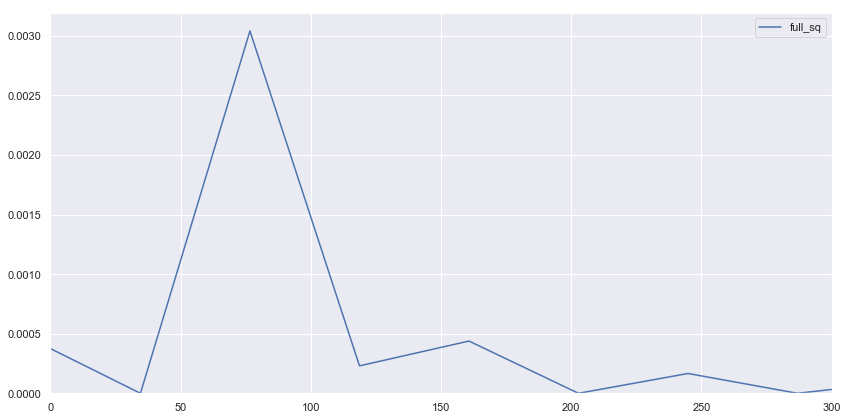

In [38]:
#plot distribution of apartments area
plt.xlim(0, 300)
sns.kdeplot(df1.full_sq)

We immediately observe an anomaly around 0m2 - that likely indicates missing values. Furthermore, there are jumps aroud 160m2 and 250m2 - likely to be larger apartments in high end segment.

In [39]:
#Mark apartmetns with full_sq of less than 5 as outliers - everything larger can potentially be a room 
df2["full_sq_outlier"]=np.where((df2.full_sq<=5)&(df2.life_sq<=5),1,0) #we also specify threshold of life_sq as there are entries with missing full_sq and present life_sq

#handle separate rooms as they are also sold at a discount
df2["room"]=np.where((df2.full_sq>5)&(df2.full_sq<=17),1,0)

In [40]:
#investigate entries with 0 full sq and >0 life_sq
df2[(df2.full_sq<=5)&(df2.life_sq>=5)]

,sub_area,year,area_price_m2,price_m2,id,timestamp,full_sq,life_sq,floor,max_floor,...,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,date,month,%_of_real_price,full_sq_outlier,room
2892,Chertanovo Juzhnoe,2014,162373,14430018,26366,2014-12-12,1,64,22,22,...,0,0,34,5,14430018,2014-12-12,12,8887,0,0
4055,Gol'janovo,2012,139110,1154000,2012,2012-04-25,5,40,5,nan,...,0,2,50,5,5770000,2012-04-25,4,830,0,0
14157,Nekrasovka,2014,103654,5983900,26267,2014-12-11,1,60,17,17,...,0,0,4,1,5983900,2014-12-11,12,5773,0,0
19249,Poselenie Shherbinka,2013,80362,3357774,11335,2013-10-18,1,40,10,17,...,1,0,14,1,3357774,2013-10-18,10,4178,0,0
22320,Poselenie Vnukovskoe,2014,117499,inf,24299,2014-11-05,0,77,4,17,...,0,1,10,0,8167508,2014-11-05,11,inf,0,0
23842,Presnenskoe,2014,235221,14923206,22415,2014-09-11,1,47,11,17,...,0,73,167,9,14923206,2014-09-11,9,6344,0,0


In [41]:
#treat full_sq outliers and fill in full_sq as price_doc over area price per m2
df2.loc[df2.full_sq_outlier == 1, 'full_sq'] = df2.price_doc/df2.area_price_m2

#recalculate price_m2
df2.loc[df2.full_sq_outlier == 1, 'price_m2'] = df2.price_doc/df2.full_sq

#recalculate % of real (average area price)
df2["%_of_real_price"]=(df2["price_m2"]/df2['area_price_m2']*100)

#describe %_of_real_price 
df2["%_of_real_price"].describe().apply(lambda x: format(x, 'f'))

count    29881.000000
mean              inf
std               nan
min          0.988248
25%         89.989015
50%        100.000000
75%        109.586735
max               inf
Name: %_of_real_price, dtype: object

We still observe nan and inf as we have failed to adjust entries, where life_sq is present with missing full_sq.

In [42]:
#treating entries with valid life_sq values and missing full_sq
df2.loc[df2.id==26366, 'full_sq']=64/avg_life_sq #life sq appears to be less than full sq based on price doc

df2.loc[df2.id==26267, 'full_sq']=60
df2.loc[df2.id==26267, 'life_sq']=60*avg_life_sq #here life_sq appears to be full_sq

df2.loc[df2.id==11335, 'full_sq']=40
df2.loc[df2.id==11335, 'life_sq']=40*avg_life_sq #same as with previous one

df2.loc[df2.id==24299, 'full_sq']=77
df2.loc[df2.id==24299, 'life_sq']=77*avg_life_sq #same as with previous one

df2.loc[df2.id==22415, 'full_sq']=47/avg_life_sq #life sq appears to be less than full sq based on price doc

df2 = df2.drop(df2[df2.id == 2121].index) #price is artificially high, are is missing --> will drop entry


#update price per m2
df2['price_m2']=df2.price_doc/df2.full_sq
#recalculate % of real (average area price)
df2["%_of_real_price"]=(df2["price_m2"]/df2['area_price_m2']*100)
#describe %_of_real_price 
df2["%_of_real_price"].describe().apply(lambda x: format(x, 'f'))

count    29880.000000
mean        95.594378
std         28.973810
min          0.988248
25%         89.858447
50%        100.000000
75%        109.578366
max        909.879691
Name: %_of_real_price, dtype: object

(0, 200)

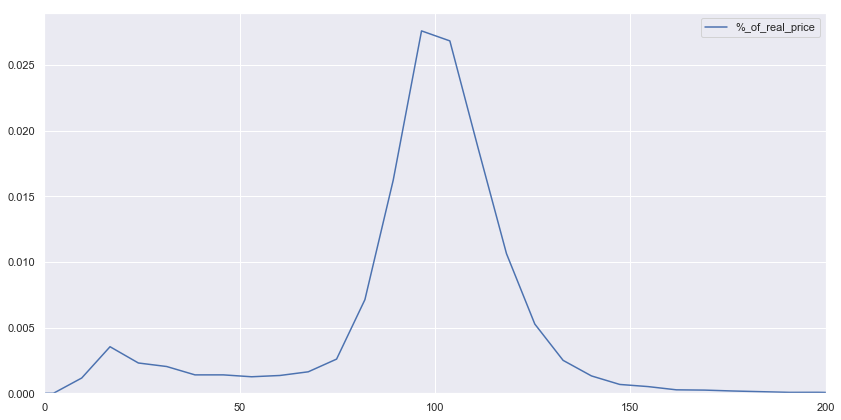

In [43]:
#plotting % of real price
sns.kdeplot(df2['%_of_real_price'])
plt.xticks([0, 50, 100, 150, 200])
plt.xlim(0, 200)

We observe that there is a substantial portion of apartments priced at 0-70% of average market value, which is indiciator of artificially low prices. We need to identify if there are any patterns with such listings because test set will likely contain similar entries. We will mark such entries as outlier and check for any constant pattern. As for upper range of prices, first we do not observe simiar pattern, as distribution curve is nearly flat after ~160% - premium for upper-class new-builts. Only in rare cases sq m price is 70+% higher than average in the area, case of luxury new-builts, which constitute a marginal share of total market in few central subareas in Moscow such as Khamovniki, Tverskoy, Arbat etc.

# Adjusting artificially low prices

Before we proceed, we need to deal with listings, where full sq<life_sq. We will use price per m2 as a proxy. If it is artificially high, life_sq will be set equal to full_sq and life_sq will be adjusted. Else we will only adjust life_sq.

In [44]:
#adjusting entries with too low full_sq
df2.loc[(df2.life_sq>df2.full_sq)&(df2['%_of_real_price']>170), 'full_sq']=df2.life_sq
df2.loc[(df2.life_sq>df2.full_sq)&(df2['%_of_real_price']>170), 'life_sq']=df2.full_sq*avg_life_sq

#adjusting other entries
df2.loc[(df2.life_sq>df2.full_sq)&(df2['%_of_real_price']<170), 'life_sq']=df2.full_sq*avg_life_sq

#updating price per m2 and % of real price
df2['price_m2']=df2.price_doc/df2.full_sq
df2["%_of_real_price"]=(df2["price_m2"]/df2['area_price_m2']*100)

In [45]:
#mark as price outliers listings, whose sq m price is less than 65% of average area price and that are not rooms. 35% discount is taken as a maximum for first_floor/bad condition etc.
#we will also try dropping such entries when training model
df2['price_outlier']=np.where((df2['%_of_real_price']<65)&(df2['room']==0),1,0)

In [46]:
#checking number of price outliers
len(df2[df2['price_outlier']==1])

3310

More than 10% of the subset are listings with artificially low prices. For now we will adjust their price, but also try deleting them when training model.

In [47]:
#see breakdown of year vs price outlier count
month_outliers=pd.pivot_table(df2[df2.price_outlier==1], index='year', values='price_doc', aggfunc="count")
month_outliers

,price_doc
year,
2011,166
2012,674
2013,773
2014,1420
2015,277


We immediately see that the year before cadastral price was revised, the number of listings with artificially low prices doubled. At the same time in 6M 2015 number of deals approximately halved from that in 2014.

In [48]:
#create checkpoint
df3=df2.copy()

In [49]:
#drop price outliers
df3=df3.drop(df3[df3.price_outlier==1].index)

We also need to check room entries and adjust if necessary.

In [50]:
df3[df3.room==1]['%_of_real_price'].describe()

count    65
mean    134
std     111
min      37
25%      91
50%     122
75%     146
max     910
Name: %_of_real_price, dtype: float64

Room prices are higher than average area price while usually rooms are sold at a discount. For now we will leave room entries without adjusting as there appears to be some unknows pattern along listings with small area (rooms).

# Filling missing floor values

In [51]:
#show breakdown by floor and % of real (average area) price
pd.pivot_table(df3, index='floor', values='%_of_real_price' )

,%_of_real_price
floor,
0,97
1,97
2,103
3,103
4,103
5,102
6,105
7,105
8,105


We observe that price per sqm for floors 0 (likely to be NA in the listings) and 1 is lower than average in the subarea. We also observe deviations from average price per sqm for floors 29+ but those listings are either unique or limited to only several entries. We will adjust floor 0 to 1 and implement new variable - first_floor as such apartments are usually sold at a discount. As for entries with missing floor values, we will set floor to 1 if %_of_real_price<97 and 0 if it >97

In [52]:
df3['floor']=np.where((df3['%_of_real_price']<97)&(df3.floor.isnull()),1,df3.floor)

In [53]:
#drop floor column
#df3=df3.drop(columns='floor')



# Explore missing max_floor values

In [54]:
#initial hypothesis: apartments on the last floor cost less than average in the sub_area
df3[(df3.max_floor.notnull())&(df3.max_floor==df3.floor)]['%_of_real_price'].describe()

count   2115
mean     102
std       16
min       51
25%       92
50%      100
75%      110
max      283
Name: %_of_real_price, dtype: float64

We see that in general there is no discount for the last floor unlike first floor.

In [55]:
#explore dependence between max floor and % of average subarea price
temp=pd.pivot_table(df3, index='max_floor', values='%_of_real_price').reset_index()
temp['count']=pd.pivot_table(df3, index='max_floor', values='id', aggfunc='count').reset_index().id
temp.sort_values(by=['count'], ascending=False, inplace=True)
temp['cumsum']=(temp['count']/temp['count'].sum()*100).cumsum()
temp.head(10)

,max_floor,%_of_real_price,count,cumsum
17,17,104,4148,23
9,9,102,2611,37
12,12,104,1961,48
5,5,98,1926,58
14,14,106,1170,65
16,16,106,995,70
1,1,104,905,75
25,25,104,660,79
22,22,107,642,82
0,0,107,536,85


We spot that 1) 5% and 3% of listings have max_floor set to 1 or 0 - probably mistake 2) entries with max_floor = 5 ("pyatietazhki") are priced below average in the sub_area. We will check, whether max_floor=0/1 is a mistake, split entries into max_floor = 5 or not and drop max_floor column.

In [56]:
#check if number of entries with floor>max_floor is equal to number of entries with floor = 0/1
len(df3[df3.floor>df3.max_floor])-len(df3[(df3.max_floor==0)|(df3.max_floor==1)])

-27

We see that those entries match almost perfectly - with ~1500 entries for each category the difference is just 2%

In [57]:
#create binary max_floor_5 variable
df3['max_floor_5']=np.where(df3.max_floor==5,1,0)

#drop max_floor column
df3=df3.drop(columns='max_floor')

In [58]:
# <5, 1, 0 explore - houses or missing values?
#material, build_year

# Exploring 'material' variable

In [59]:
pd.pivot_table(df3, index='material', values='id', aggfunc='count')

,id
material,
1,12541
2,2559
3,1
4,1159
5,1332
6,704


We do not have description of wall material and can only operate with numeric values.

In [60]:
#check correlation between wall material and % of subarea price
pd.pivot_table(df3, index='material', values='%_of_real_price', aggfunc='median')

,%_of_real_price
material,
1,102
2,102
3,114
4,104
5,103
6,102


We do not observe any substantial correlation between wall material and average subarea price. The only outlier is wall material #1, which is present in only one listing. As a result we willl drop material variable.

In [61]:
#drop material variable
df3=df3.drop(columns='material')

# Exploring 'build_year' variable

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117]), <a list of 118 Text xticklabel objects>)

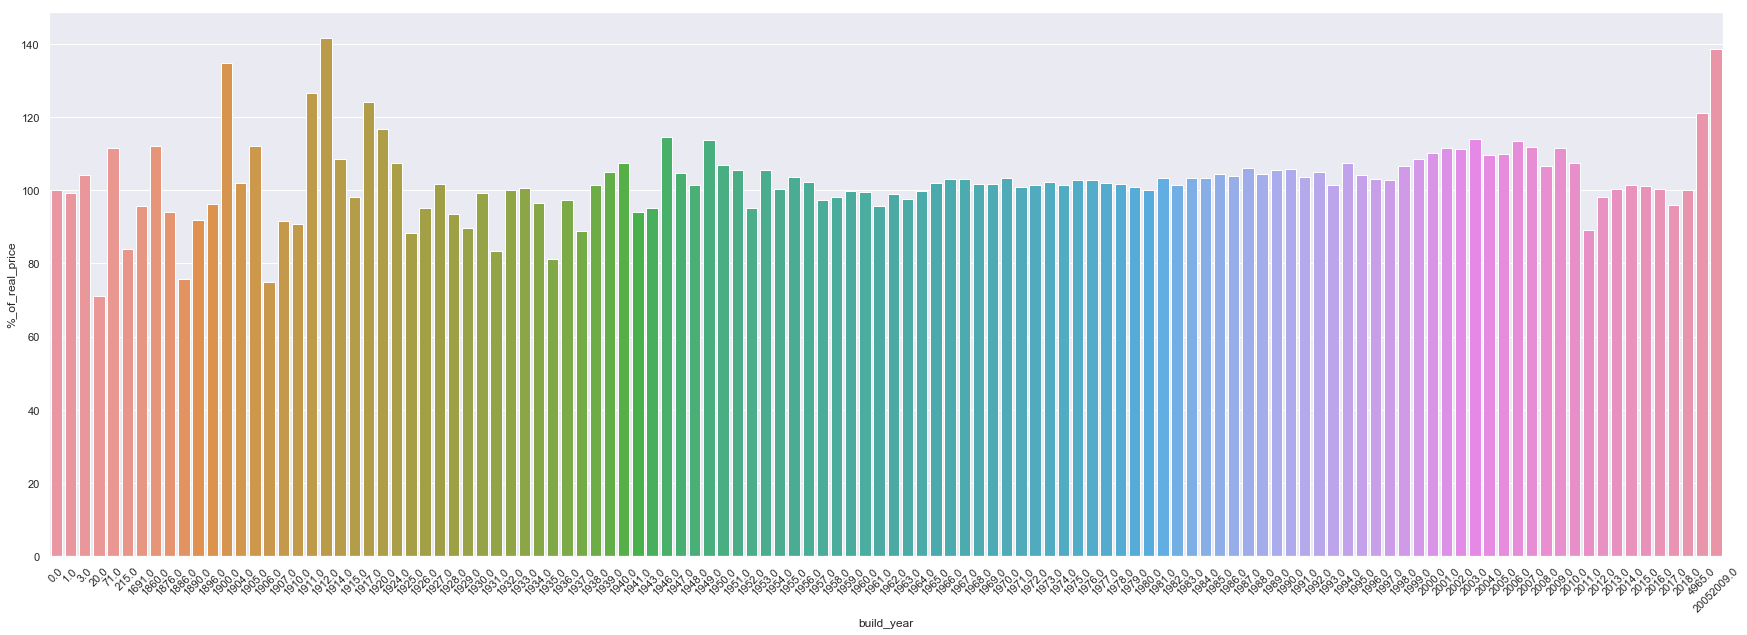

In [62]:
temp=pd.pivot_table(df3, index='build_year', values='%_of_real_price', aggfunc='median').reset_index()
temp['count']=pd.pivot_table(df3, index='build_year', values='id', aggfunc='count').reset_index().id
temp['cumsum']=temp['count'].cumsum()

sns.set(rc={'figure.figsize':(30,10)})
sns.barplot(data=temp, x=temp.build_year, y='%_of_real_price')
plt.xticks(rotation=45)

We observe that for buildings built before mid 1950s there is a substantial price fluctuation - most probably due to small number of listings for each year. We also see that there are 4 incorrect entries - year 0,1,4965,20052009. In the next steps we will check, whether number of listings with build_year before mid 1950s is indeed small and, if yes, divide build_year into several categories: 1955-1997, 1997-2011, 2011-2018. Such division is based on the barplot above, where prices are relatively stable in the first category, that go up slightly (most likely due to fact that such houses are considered "novostroyki" or newly-built) and then fall down (probably due to rise in cheaper mass market construction).

In [63]:
#check cumulative number of listings between 1950 and 1960 
temp[(temp.build_year>1950)&(temp.build_year<=1960)]

,build_year,%_of_real_price,count,cumsum
48,1951,106,21,1050
49,1952,95,38,1088
50,1953,106,21,1109
51,1954,100,32,1141
52,1955,104,47,1188
53,1956,102,38,1226
54,1957,97,104,1330
55,1958,98,149,1479
56,1959,100,181,1660
57,1960,99,305,1965


We indeed observe a spike in cumulative number of listing with build_year>1956. A quick internet search also proves that housing construction in the USSR has indded seen a sharp upturn in 1955 with an increase in number of new so-called "stalinki" - houses named after Joseph Stalin. 

In [64]:
#dividing build_year into three categories
df3['build_year_1955-1997']=np.where((df3.build_year>=1955)&(df3.build_year<1997),1,0)
df3['build_year_1997-2011']=np.where((df3.build_year>=1997)&(df3.build_year<2011),1,0)
df3['build_year_2011-2015']=np.where((df3.build_year>=2011)&(df3.build_year<=2015),1,0)

#drop build_year variable
df3=df3.drop(columns='build_year')

# Exploring "num_room" variable

In [65]:
#create checkpoint
df4=df3.copy()

In [66]:
#check correlation between number of rooms and sq m price
pd.pivot_table(df4, index="num_room", values=['%_of_real_price'], aggfunc='median')

,%_of_real_price
num_room,
0,100
1,107
2,100
3,96
4,96
5,98
6,91
8,89
9,153


We observe that 1-room apartments on average have a higher sq m price that 2+ room listings. 2-room listings' sq m price is in line with subarea average. 3+ room apartments' average price per sq m is on average lower than average in the subarea. As large share of num_room entries is missing and we cannot precisely estimate # of rooms when missing, we will additionally split apartments by their area.

In [67]:
df4.groupby('num_room').describe().reset_index().pivot_table(index='num_room', values='full_sq')

C:\Users\v.butorin\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,25%,50%,75%,count,max,mean,min,std
num_room,,,,,,,,
0,45,58,82,11,164,72,34,38
1,34,38,41,6768,209,39,11,10
2,45,53,61,7024,220,54,16,11
3,64,75,81,4072,176,76,13,17
4,85,98,112,371,216,101,37,28
5,106,115,123,35,206,120,38,41
6,102,150,212,8,303,160,57,80
8,166,173,180,2,187,173,159,20
9,220,220,220,1,220,220,220,nan


In [68]:
#divide apartments into three area categories (1/2/3+ room apartments bases on mean area of 1/2/3 room aparments)
df4['area<39']=np.where(df4.full_sq<39,1,0)
df4['area_39_54']=np.where((df4.full_sq>=39)&(df4.full_sq<54),1,0)
df4['area_54+']=np.where(df4.full_sq>=54,1,0)

#drop num_room column
df4=df4.drop(columns='num_room')

# Exploring "kitch_sq" variable

In [69]:
df4.groupby('kitch_sq').describe().reset_index().pivot_table(index='kitch_sq', values='%_of_real_price')

C:\Users\v.butorin\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,25%,50%,75%,count,max,mean,min,std
kitch_sq,,,,,,,,
0,93,101,110,1333,271,103,45,19
1,94,100,109,4393,400,102,37,14
2,108,131,145,14,201,130,76,35
3,100,123,133,43,195,119,51,29
4,94,103,115,77,155,105,73,17
5,91,99,108,2188,220,100,65,14
6,94,101,110,1986,188,103,65,14
7,97,106,115,1081,279,106,65,17
8,97,104,112,2322,396,105,66,16


We observe two things: 1) almost 6000 entries or 1/3 of available entries have kitch_sq of 0 or 1, which is effectively equal to NaN. 2) Apartments with kitch_sq of 5 have average price equal to that in the sub_area, aparments with kitch_sq>5 are generally more expensive. We will therefore introduce binary variable kitch_sq 5m.

In [70]:
df4['kitchen_5m']=np.where(df3.kitch_sq==5,1,0)
df4=df4.drop(columns="kitch_sq")

# Exploring "state" variable

In [71]:
#explore count of listings in each state
pd.pivot_table(data=df4, index='state', values='%_of_real_price', aggfunc='count')

,%_of_real_price
state,
1,4355
2,4935
3,5008
4,375
33,1


We observe that most listing where state is provided fall into one of three categories. There is clearly an error - state 33, we will change it to 3.

In [72]:
#changing entry with state 33 to 3
df4.state=np.where(df4.state==33,3,df4.state)

In [73]:
#explore average price in each listing state
pd.pivot_table(data=df4, index='state', values='%_of_real_price', aggfunc=['median'])

,median
,%_of_real_price
state,
1,100
2,101
3,105
4,115


Apparently, higher state indicates better apartment condition. Wheres state 1 and 2 do not affect listing price, state 3 and 4 do. We will therefore include one-hot encoding for state 3 and 4 and drop state column thereafter.

In [74]:
#applying one hot to state 3 and 4
df4['state_3']=np.where(df4.state==3,1,0)
df4['state_4']=np.where(df4.state==3,1,0)

#drop state column
df4=df4.drop(columns='state')

# Explore "product_type" variable

In [75]:
#explore number of listing in each product_type
pd.pivot_table(data=df4, index='product_type', values='%_of_real_price', aggfunc='count')

,%_of_real_price
product_type,
Investment,16287
OwnerOccupier,10283


In [76]:
#explore average price in each listing product_type
pd.pivot_table(data=df4, index='product_type', values='%_of_real_price', aggfunc=['median', 'mean'])

,median,mean
,%_of_real_price,%_of_real_price
product_type,,
Investment,103,105
OwnerOccupier,100,101


There is clearly a premium to "investment" type listings. We will therefore implement new variable "investment_type" and assign values 1 or 0 to it.

In [77]:
#apply one hot to investment listjngs
df4["investment_type"]=np.where(df4.product_type=='Investment',1,0)

#drop produt_type column
df4=df4.drop(columns="product_type")

In [78]:
##############################
##############################
##############################
#We have finished analyzing key criteria and will now go through each other variable

In [79]:
#create data checkpoint
df5=df4.copy()

In [80]:
df5.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26570 entries, 1 to 29879
Data columns (total 305 columns):
sub_area                                 26570 non-null object
year                                     26570 non-null int64
area_price_m2                            26570 non-null float64
price_m2                                 26570 non-null float64
id                                       26570 non-null float64
timestamp                                26570 non-null object
full_sq                                  26570 non-null float64
life_sq                                  26570 non-null float64
floor                                    26491 non-null float64
area_m                                   26570 non-null float64
raion_popul                              26570 non-null float64
green_zone_part                          26570 non-null float64
indust_part                              26570 non-null float64
children_preschool                       26570 non-null float6

# Raion_popul / area_m

First two variables, which have not been analyzed yet are raion_popul and area_m; it is better to analyze them together, so we will implement new variable - area_density

In [82]:
#calculate number of people per square kilometer
df5['area_density']=df5.raion_popul/(df5.area_m/10000)

In [119]:
#create pivot with area density and price per m2 (not using sub_area average price, as it is irrelevant here)
temp=pd.pivot_table(data=df5, index=df5.area_density.round(), values=['price_m2'], aggfunc='median').reset_index()

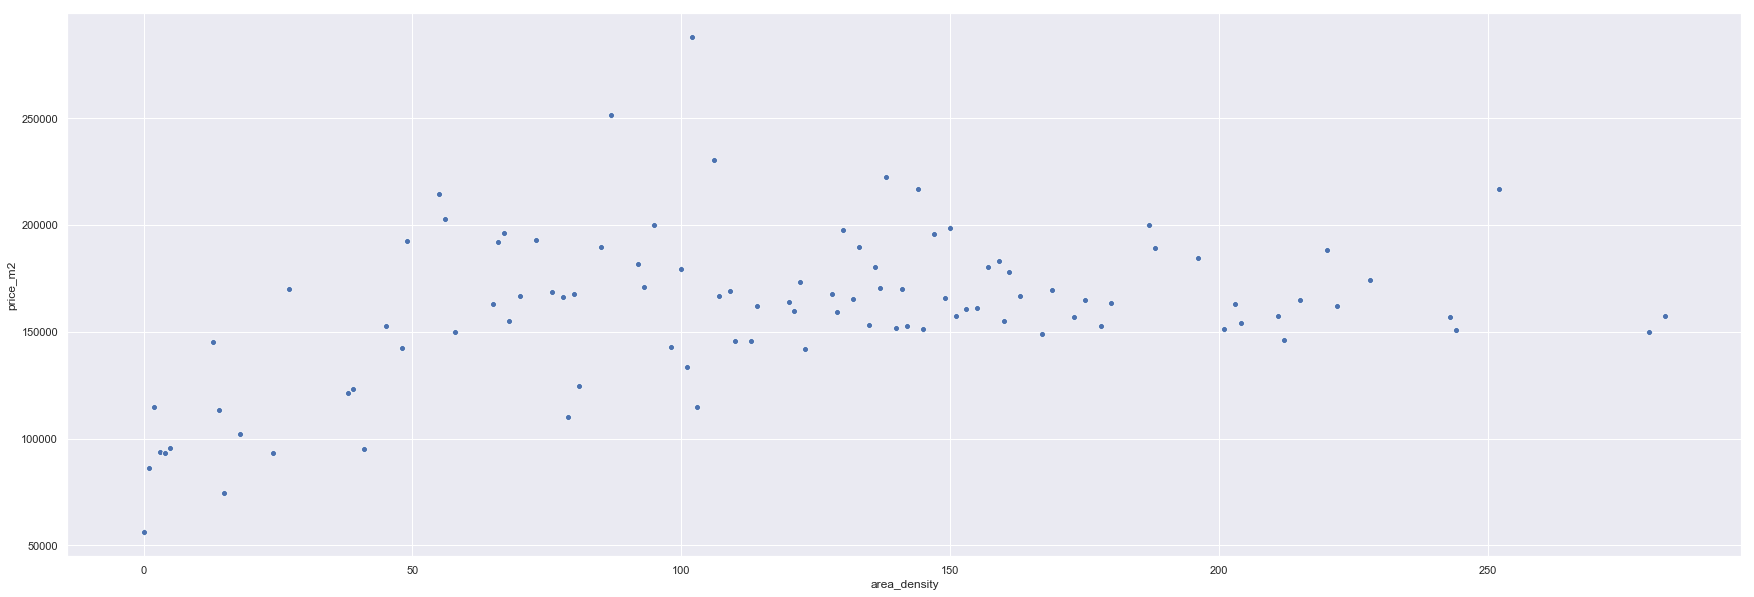

In [118]:
#plot chart
sns.scatterplot(data=temp, x='area_density', y='price_m2')

We spot that price per m2 is rising while density goes from 0 to 100 and stays at a relatively stable level thereafter. 

# green_zone_part

In [121]:
#create pivot with area density and price per m2 (not using sub_area average price, as it is irrelevant here)
temp=pd.pivot_table(data=df5, index=df5.green_zone_part*100, values=['price_m2'], aggfunc='median').reset_index()

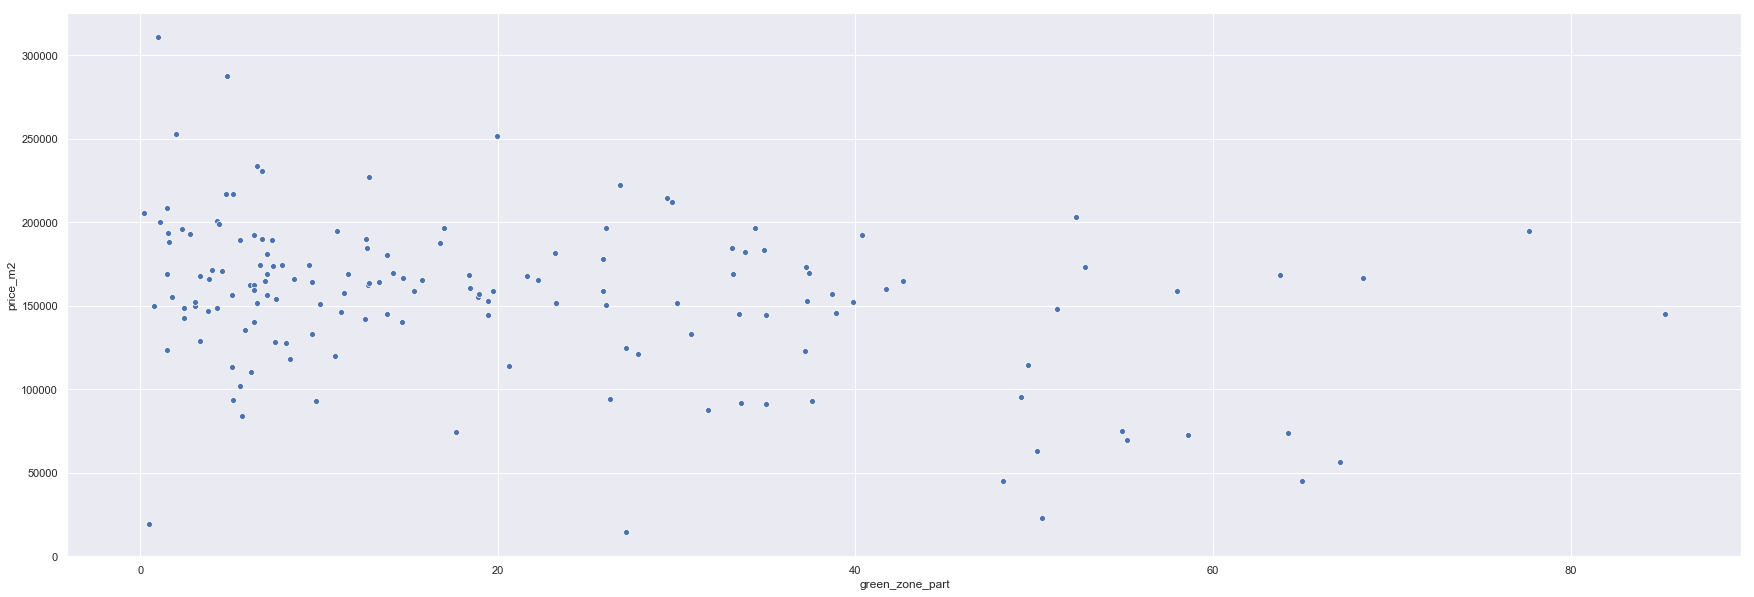

In [122]:
#plot chart
sns.scatterplot(data=temp, x='green_zone_part', y='price_m2')

In [123]:
temp.green_zone_part.corr(temp.price_m2)

-0.33390548255048264

We observe a slight negative correlation between green zone share and price per m2. That can be explained by the fact that there are more green zones as you get farther from city center with higher m2 prices.